## Comparision Plots GF, CSS, and DNM For A1 and LBelt

In [1]:

%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from vis import basic_plot
import numpy as np
from vis import zoom_to_multiple_rois, basic_plot


ModuleNotFoundError: No module named 'vis'

## Plottings are for regions A1 and LBelt.

In [2]:
css = np.load('saved_model_params/css_A1_LBelt.npz')
gm = np.load('./saved_model_params/gf_A1_LBelt.npz')
dn = np.load('./saved_model_params/dnm_A1_LBelt.npz')

NameError: name 'np' is not defined

In [ ]:
mask = pd.read_csv('./auditory_A1_LBelt.csv')
mask = np.array(mask['mask']).astype(bool)

## 1. Surface plot for Surround size - center size (for A1 and LBelt)

### For Grid Search

In [4]:
np.max(dn["gridsearch_params"][:, 5])

3.562863826751709

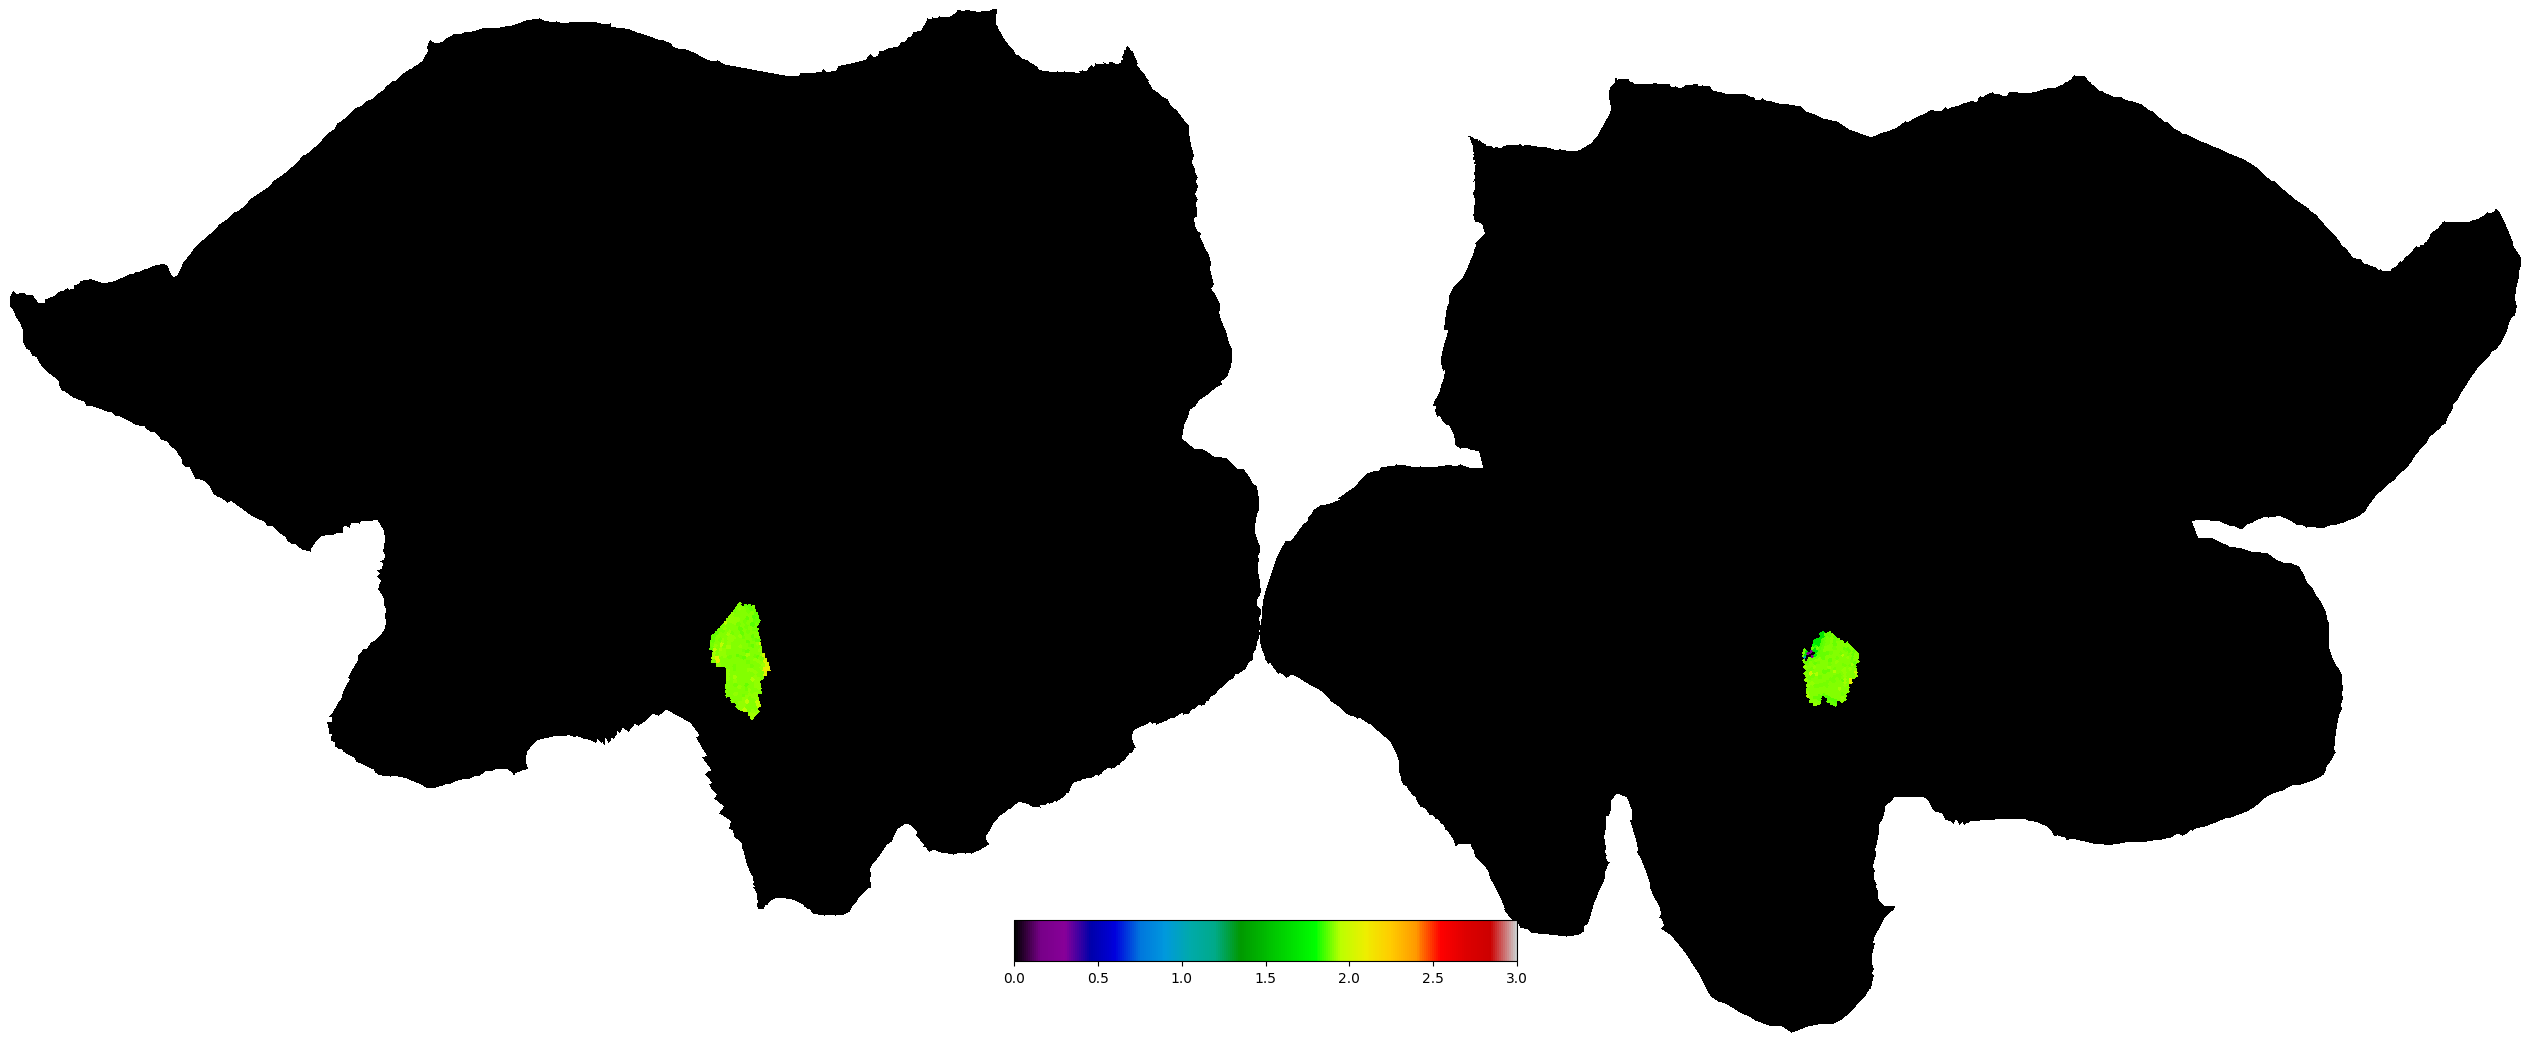

In [5]:
bp=basic_plot(dn["gridsearch_params"][:, 5] - dn["gridsearch_params"][:, 1], colorbar = True, vmax=3,cmap='nipy_spectral')

### Iterative search

In [6]:
np.mean(dn["iterative_search_params"][:, 5] - dn["iterative_search_params"][:, 1])

0.0001114842976383614

 The mean of the difference between the two is almost zero. To visualize this I am setting the vertices out of the ROI for one of the params a higher number.

In [7]:
dn_copy = np.copy(dn["iterative_search_params"])
dn_copy[:, 5][~mask] = 5

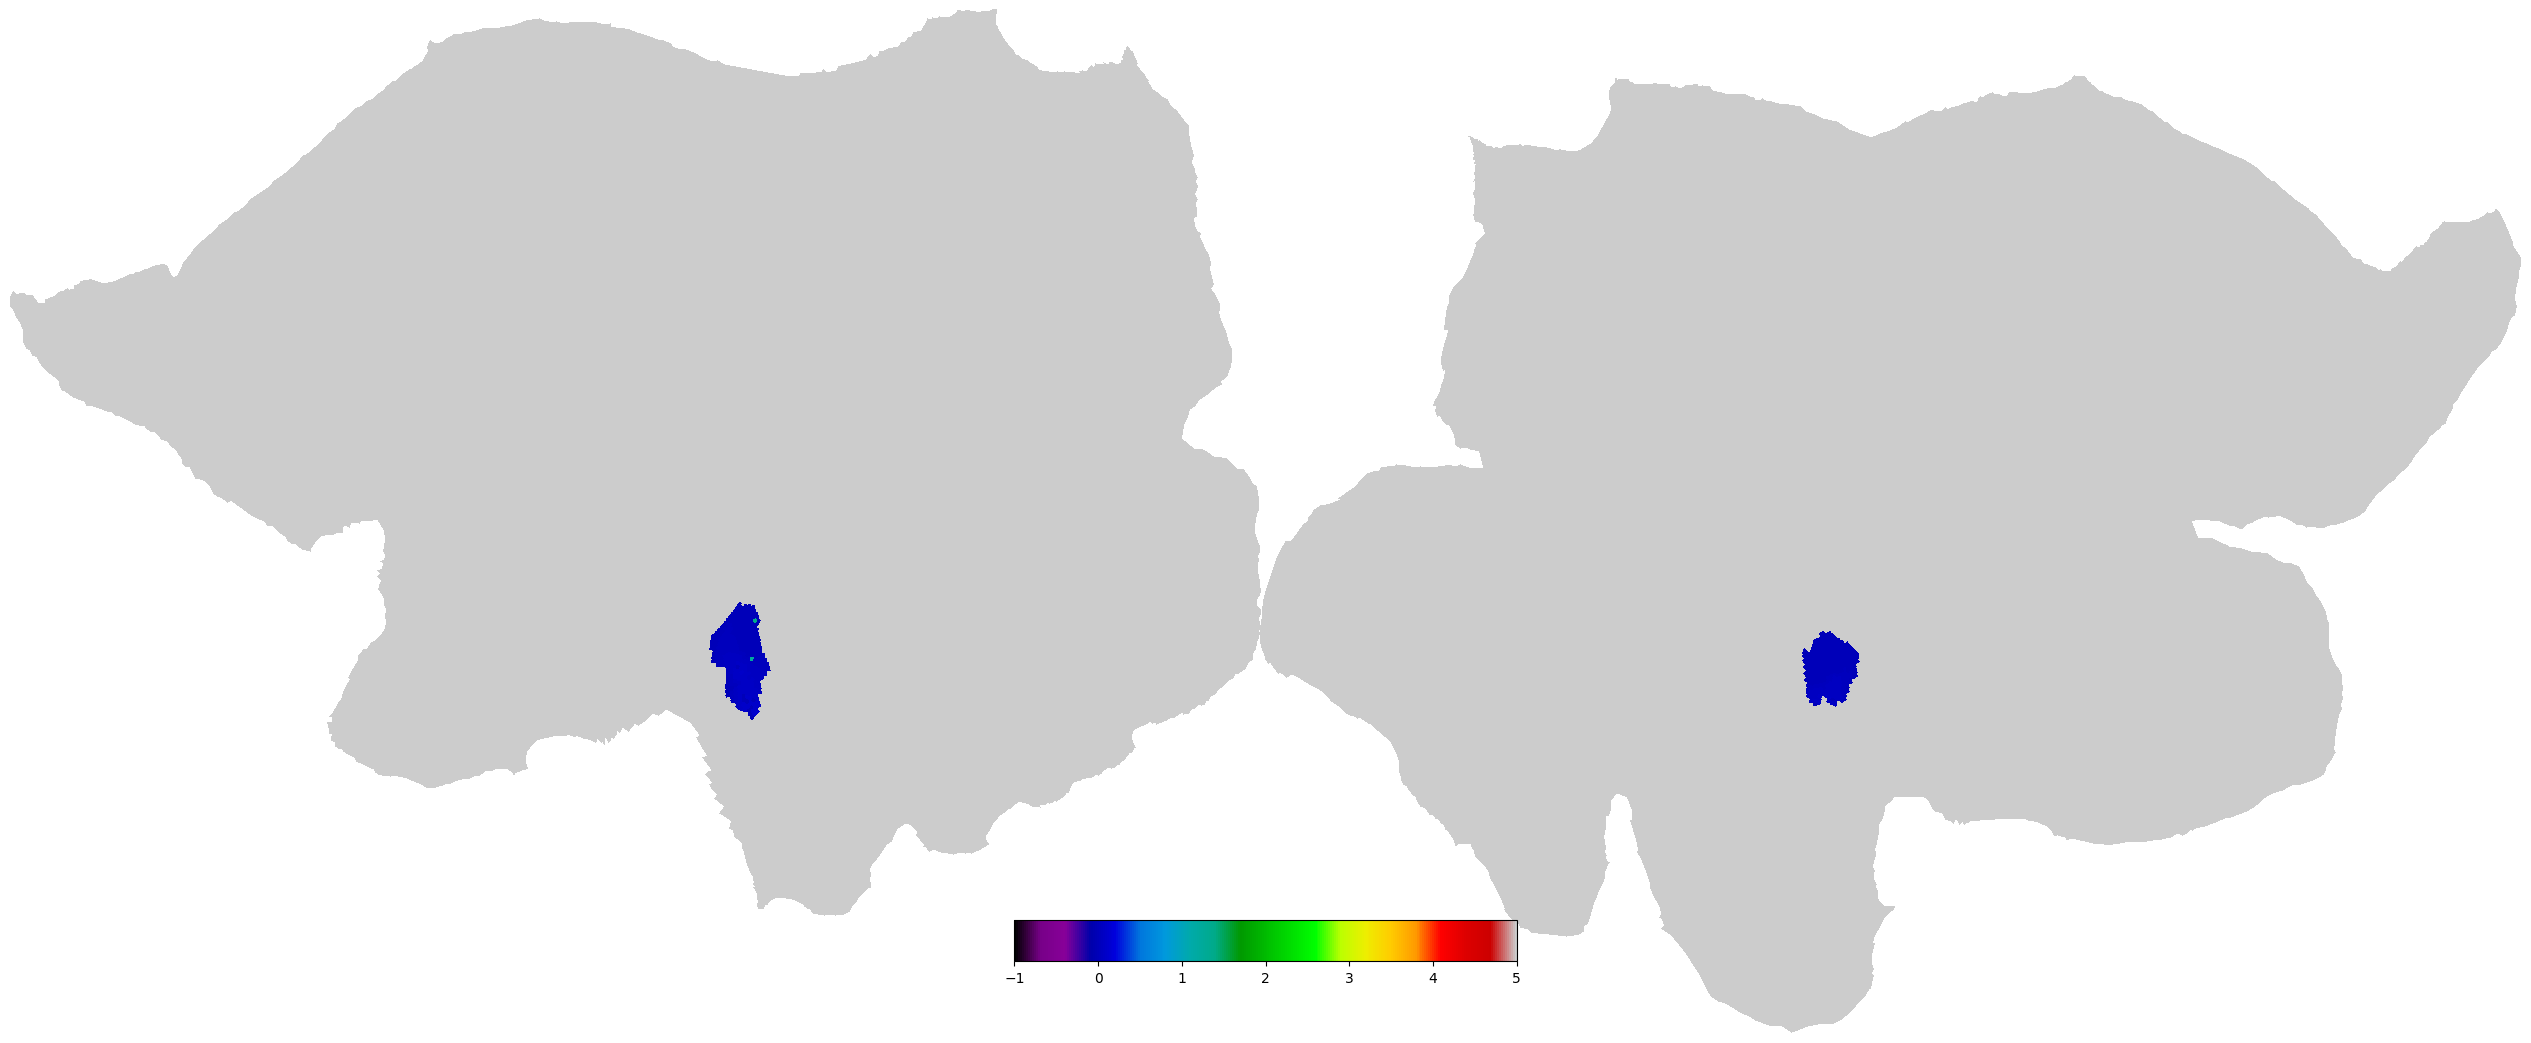

In [8]:
bp=basic_plot(dn_copy[:, 5] - dn_copy[:, 1], colorbar = True, vmin =-1, vmax=5,cmap='nipy_spectral')

### A zoom plot for the left hemisphere. 

[-210.70038, -168.02205, -77.59999, -17.929646]
[-206.27255, -160.37436, -80.13305, -9.50556]


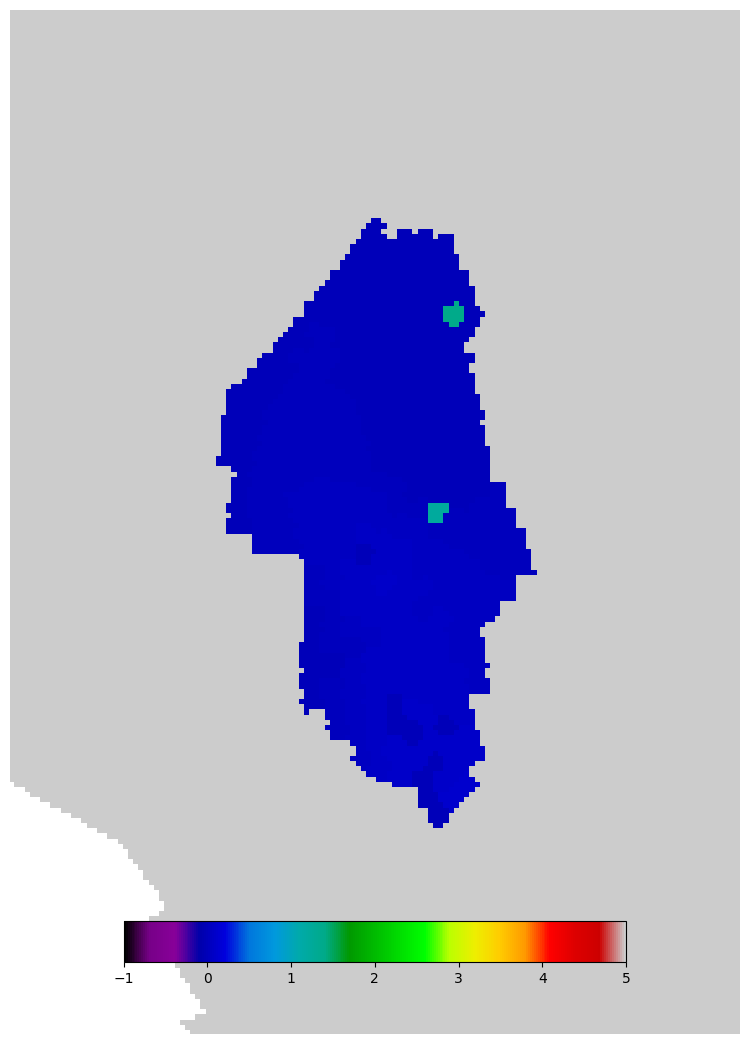

In [9]:

bp=basic_plot(dn_copy[:, 5] - dn_copy[:, 1], colorbar = True, vmin =-1, vmax=5,cmap='nipy_spectral')
hem = 'left'
zoom_to_multiple_rois('hcp_999999', ['A1', 'LBelt'], hem, margin=15.0)
plt.show()

## 2.  Within set R2 between CSS and Norm model 

(Note: this R2 are not cross validated, I was saving time by running only one fold, but I will be running all 4 folds now.)

#### For Iterative Search params

#### Train Set

Difference of R2 of iterative search for Divisive normalisation vs CSS model.

In [15]:
train_r2_diff = np.copy(dn["iterative_search_params"][:, -1] - css["iterative_search_params"][:, -1])
train_r2_diff[~mask] = -1

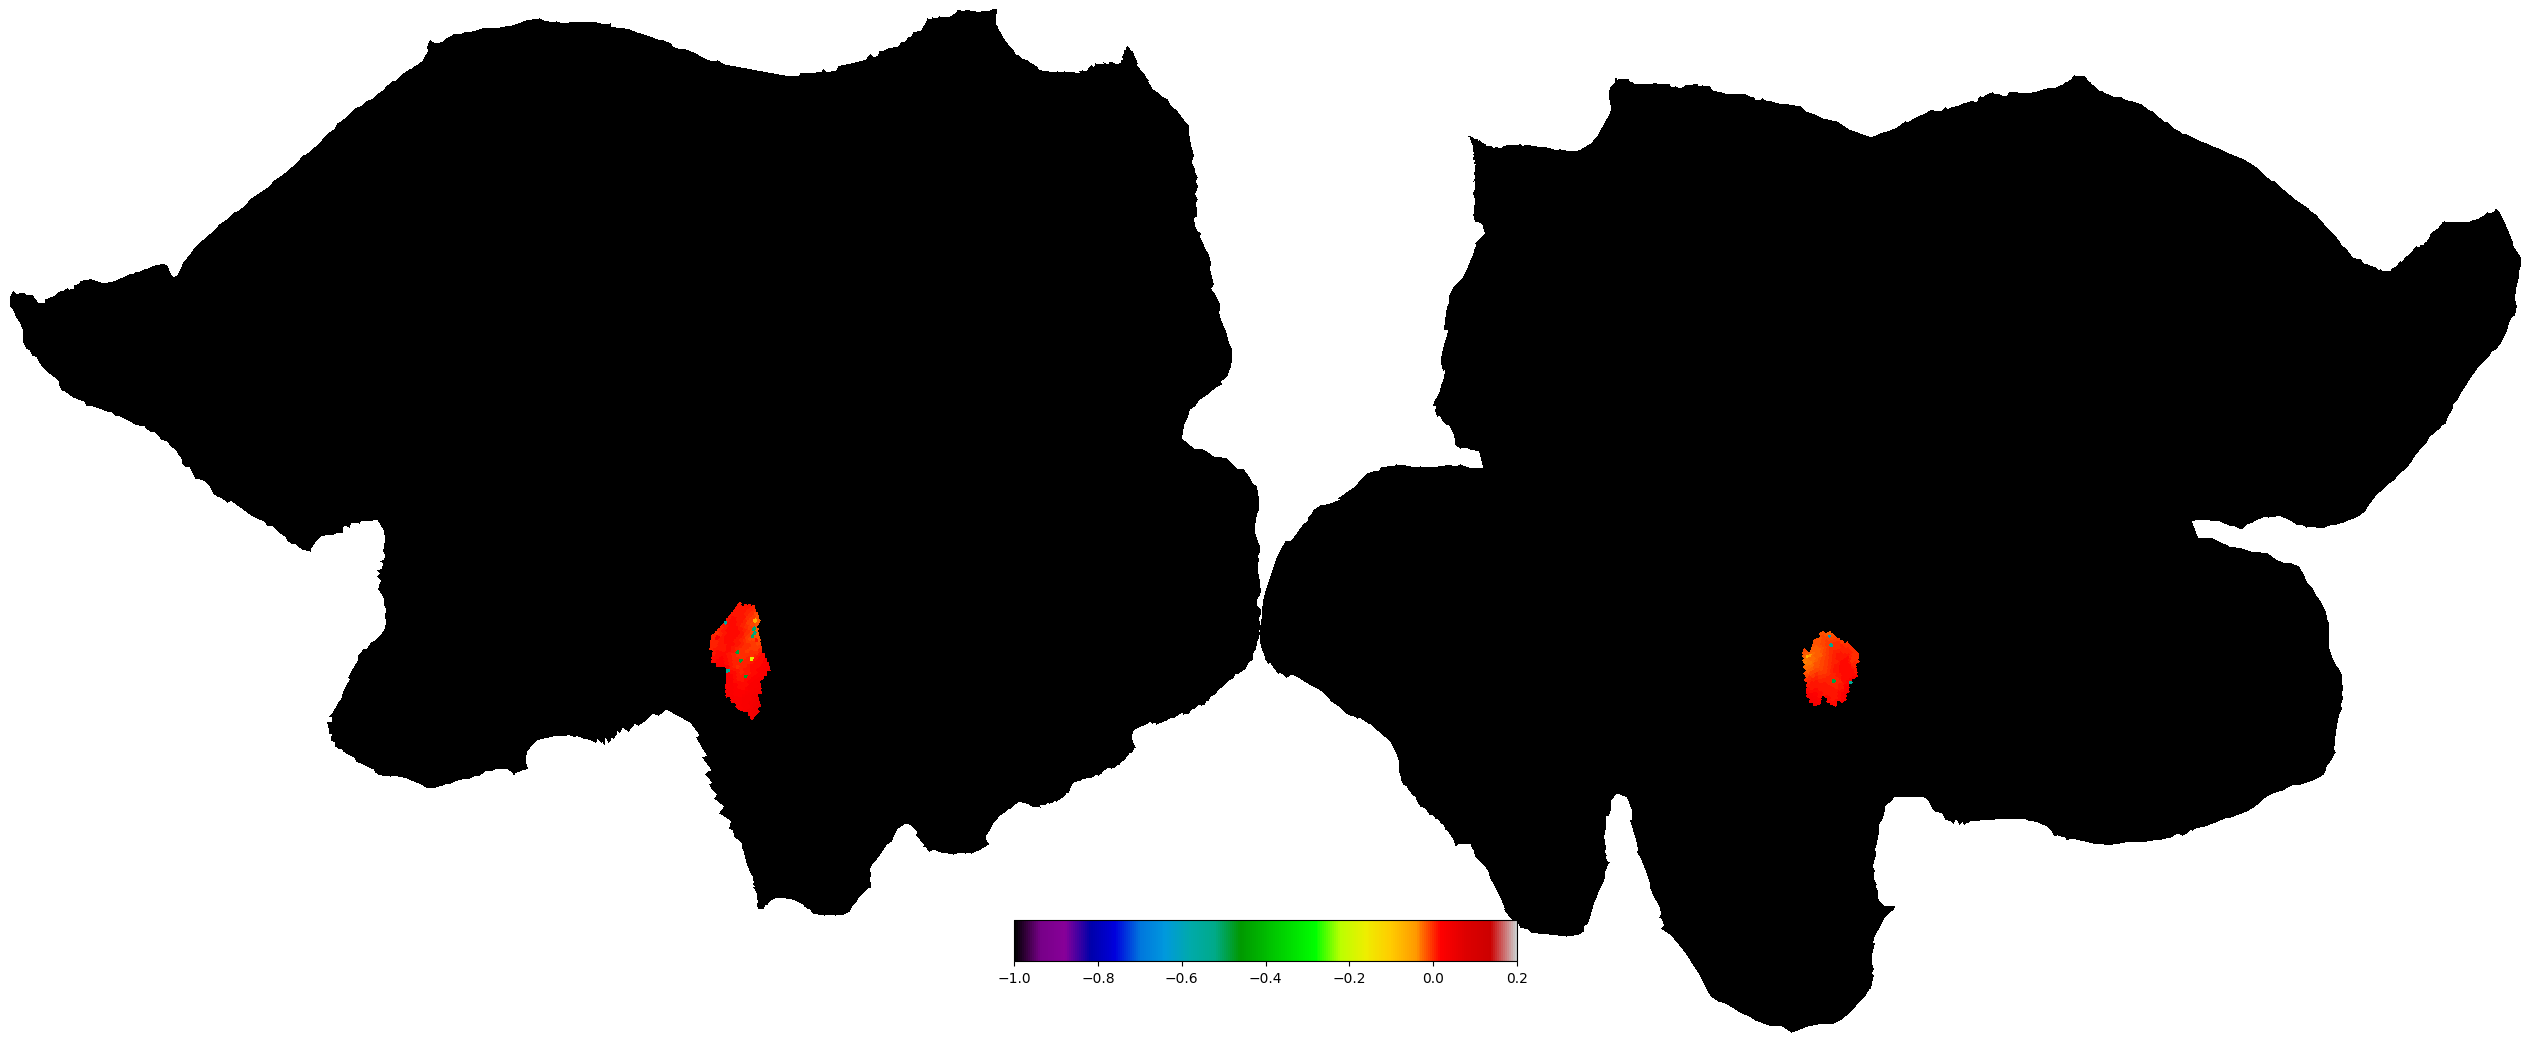

In [20]:
bp=basic_plot(train_r2_diff, colorbar = True, vmin=-1.0, vmax=.2,cmap='nipy_spectral')

### A zoom plot for the left hemisphere. 

[-210.70038, -168.02205, -77.59999, -17.929646]
[-206.27255, -160.37436, -80.13305, -9.50556]


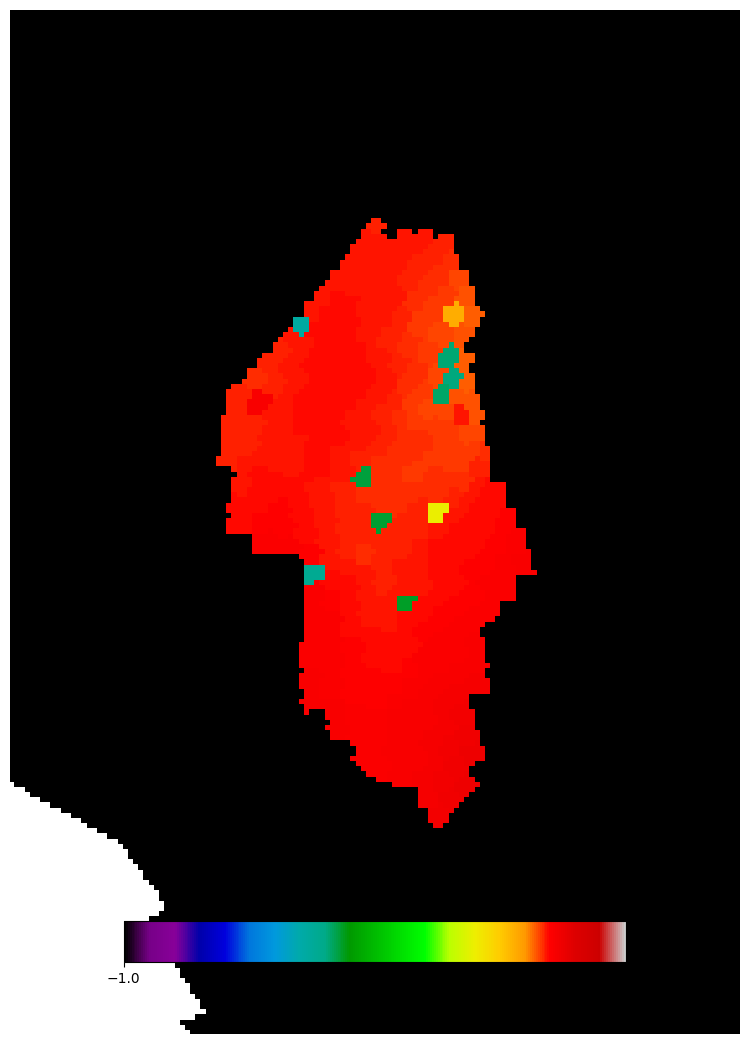

In [23]:
bp=basic_plot(train_r2_diff, colorbar = True, vmin=-1.0, vmax=.2,cmap='nipy_spectral')
hem = 'left'
zoom_to_multiple_rois('hcp_999999', ['A1', 'LBelt'], hem, margin=15.0)
plt.show()

#### Test Set

Difference in R2 for test set DN vs CSS.

In [21]:
test_r2_diff = np.copy(dn['CV_rsq'] - css['CV_rsq'])
test_r2_diff[~mask] = -1

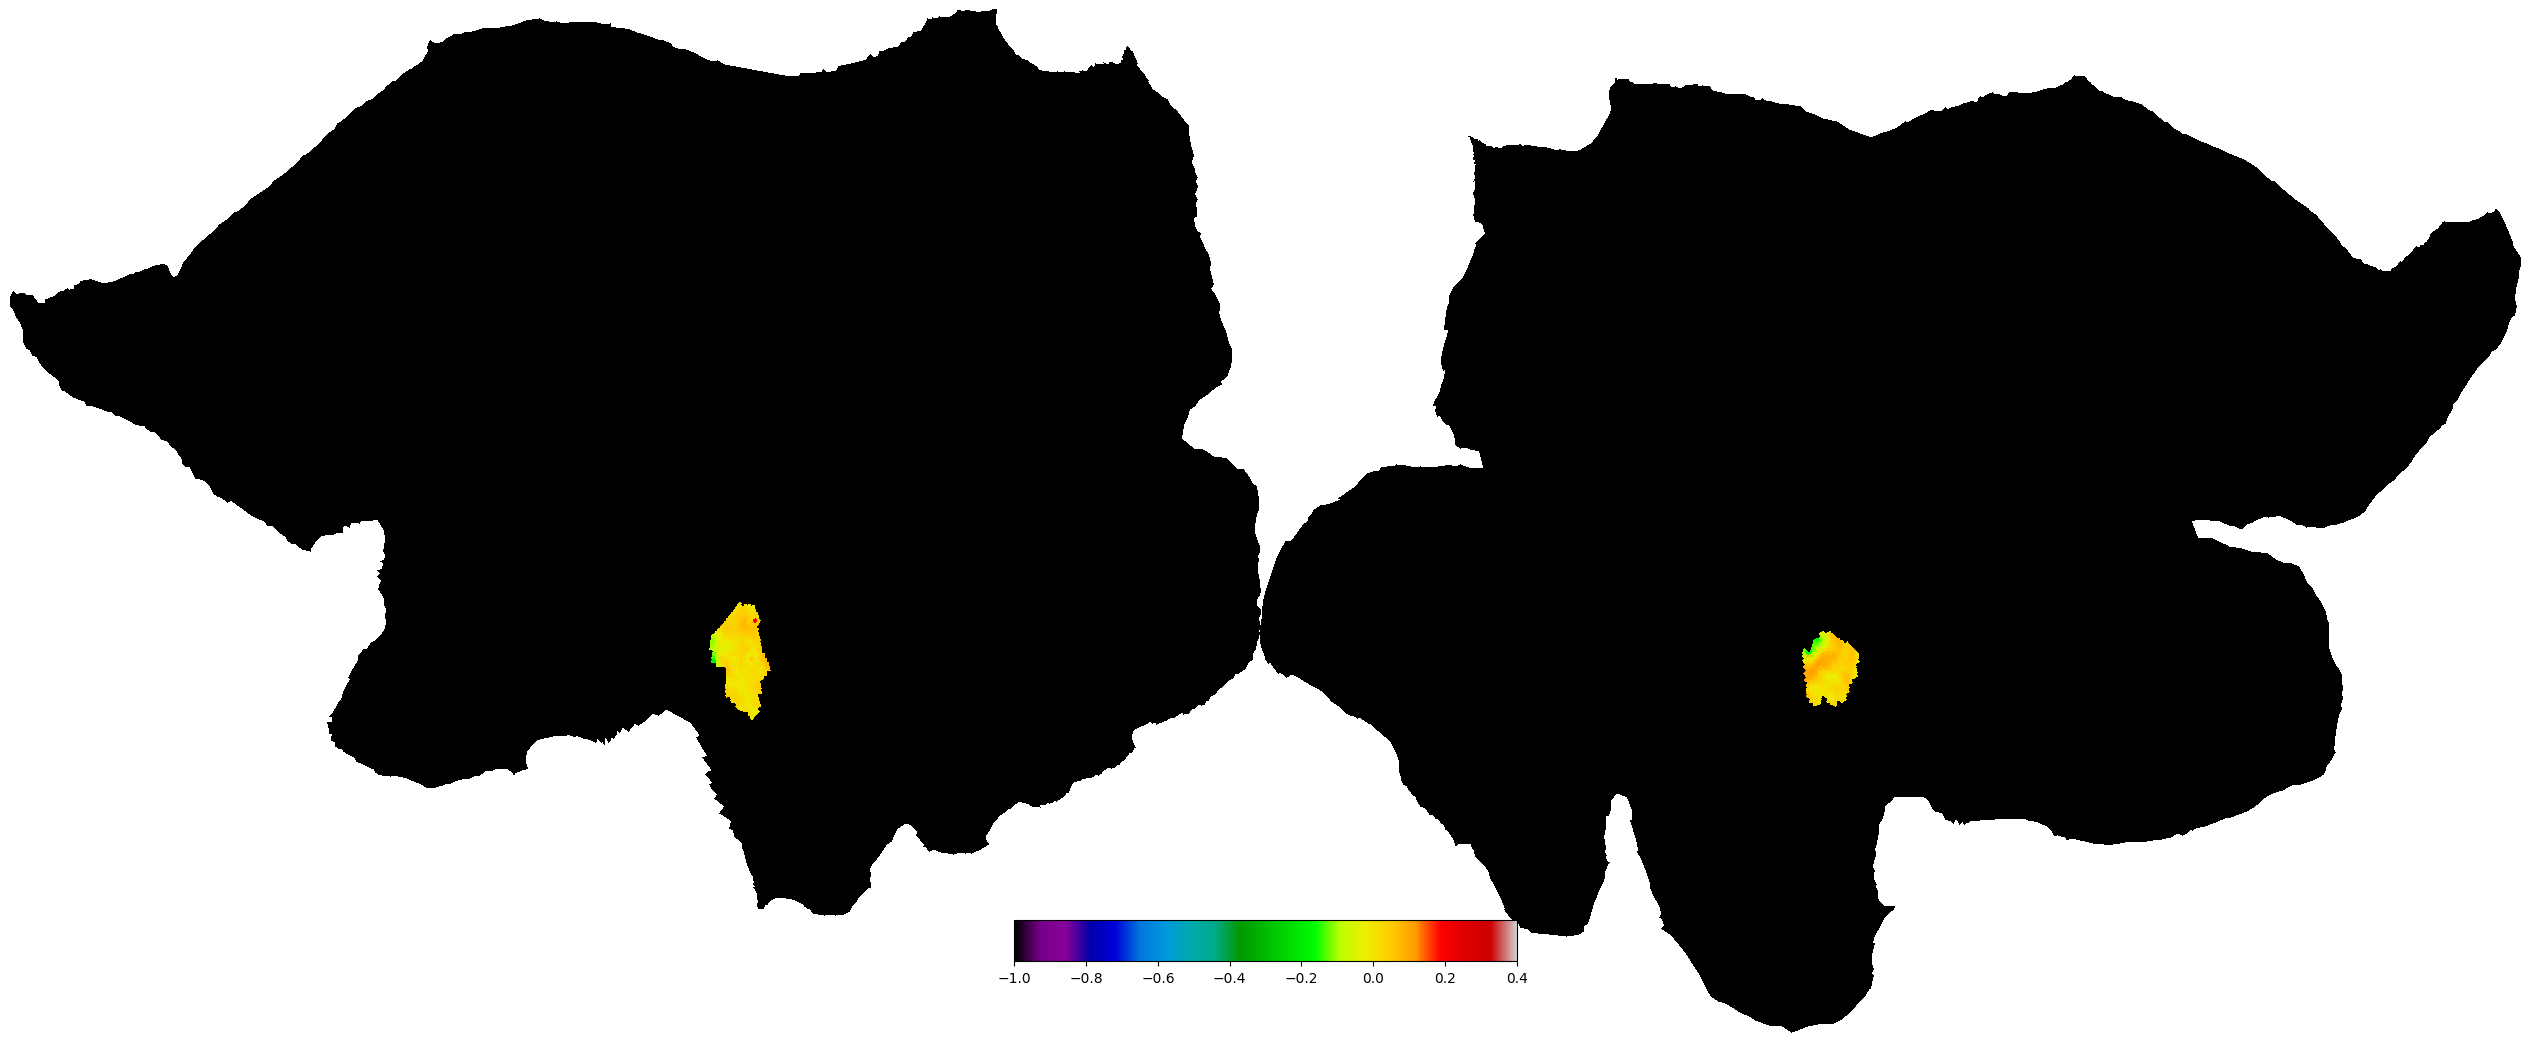

In [26]:
bp=basic_plot(test_r2_diff, colorbar = True, vmin=-1.0, vmax=.4,cmap='nipy_spectral')

### A zoom plot for the left hemisphere. 

[-210.70038, -168.02205, -77.59999, -17.929646]
[-206.27255, -160.37436, -80.13305, -9.50556]


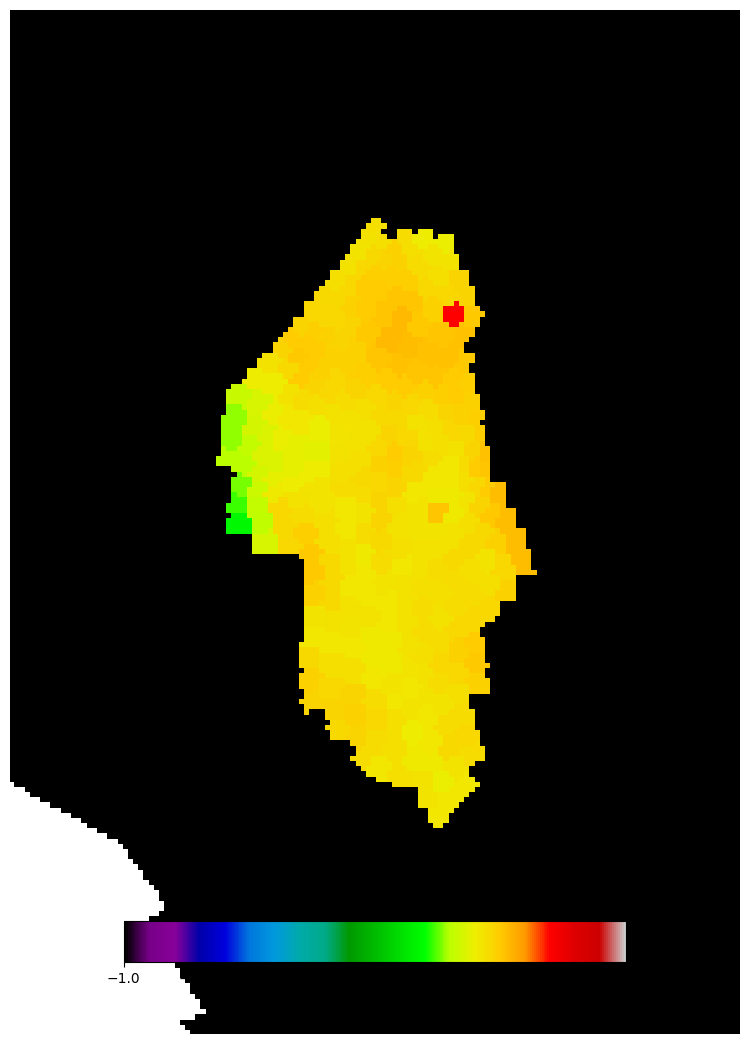

In [25]:
bp=basic_plot(test_r2_diff, colorbar = True, vmin=-1.0, vmax=.4,cmap='nipy_spectral')
hem = 'left'
zoom_to_multiple_rois('hcp_999999', ['A1', 'LBelt'], hem, margin=15.0)
plt.show()

## 3. Plot of a good-fitting voxel's target data Vs. prediction -- Divisive normalisation model.

Load the subject and the models....

In [92]:

def predict_time_series(model, voxel_index, params):
    """
    Calculates prediction for a given voxel_index.
    params: 
        model: model to be used to calculate predictions
        voxel_index: index of vertice
        params: parameters of the model
    """
    voxel_params = params[voxel_index]
    voxel_prediction = model.return_prediction(*voxel_params)

    return voxel_prediction.flatten()

In [220]:
def plot_time_series(predicted, target, voxel_index, fit_type, param_value, predicted_label="Predicted", target_label="Target", limit_time=False):
    """
        Plots predicted vs. target timeseries for a given data

    """
    plt.figure(figsize=(14, 8))
    plt.plot(predicted, label="predicted_label", linewidth=0.5)
    plt.plot(target, label=target_label, linewidth=0.5, linestyle='dashed')  
    plt.text(0.5, 0.95, f'{param_value}', fontsize=12, ha='center', color="cornflowerblue", va='center', transform=plt.gca().transAxes)

    plt.title(f'Target Vs. predicted using {fit_type} for Voxel with highest R2')
    plt.axhline(0, color='grey', linewidth=0.5)  
    if limit_time:
        plt.xlim([0, 700]) 

    plt.xlabel('Time (TRs)')
    plt.ylabel('Signal Change (%)')
    plt.legend()
    plt.show()

In [36]:
from base import HCP_subject
from analysis import Analysis
import numpy as np
from prfpy.stimulus import PRFStimulus1D

In [ ]:
my_sub=HCP_subject('999999','movie','/tank/oso210/projects/Tonotopy_2021/config.yml')
my_sub.prep_data()
my_sub.import_data()
my_analysis=Analysis(my_sub)

In [38]:

fold=0
blengths=np.array(my_analysis.sub.experiment_dict['run_durations'])[np.array(my_analysis.sub.folds[fold])]-my_analysis.sub.experiment_dict['test_duration']
tl=list(blengths)
        
train_stim=PRFStimulus1D(my_analysis.sub.dm_train[fold],my_analysis.frequencies,TR=my_analysis.TR,task_lengths=tl)
test_stim=PRFStimulus1D(my_analysis.sub.dm_test[fold],my_analysis.frequencies,TR=my_analysis.TR, task_lengths=[818])



In [40]:
from prfpy.model import Norm_Iso1DGaussianModel

nm=Norm_Iso1DGaussianModel(train_stim,normalise_RFs=False,filter_predictions=True,filter_type='sg',filter_params=my_analysis.fparams)


#### Identify a good fitting vertice using R2 for both grid fit and iterative fit.


In [107]:
max_r2_grid_fit = np.argmax(dn['gridsearch_params'][:, -1])
max_r2_iterative_fit = np.argmax(dn['iterative_search_params'][:, -1])
max_r2_grid_fit, max_r2_iterative_fit


(77186, 57747)

### For grid fit 

In [64]:
nm.stimulus = train_stim
target_time_series = my_analysis.sub.data_train[fold].T[max_r2_grid_fit]
predicted_time_series = predict_time_series(nm, max_r2_grid_fit, dn['gridsearch_params'])

In [111]:
param_values = f" * R2: {round(dn['gridsearch_params'][max_r2_grid_fit][-1], 3)} \n * Center size: {round(dn['gridsearch_params'][max_r2_grid_fit][1], 4)} \n* Surround size: {round(dn['gridsearch_params'][max_r2_grid_fit][5], 4)}"

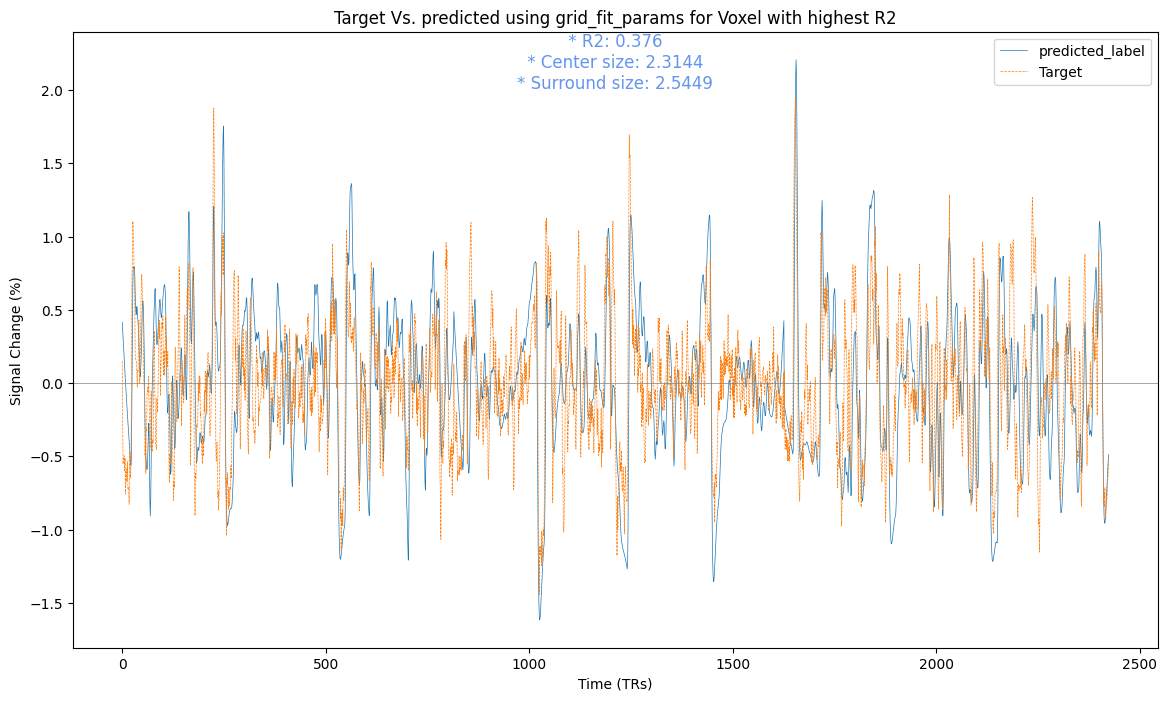

In [221]:
plot_time_series(predicted_time_series, target_time_series, max_r2_grid_fit, param_value= param_values, fit_type="grid_fit_params", limit_time=False)

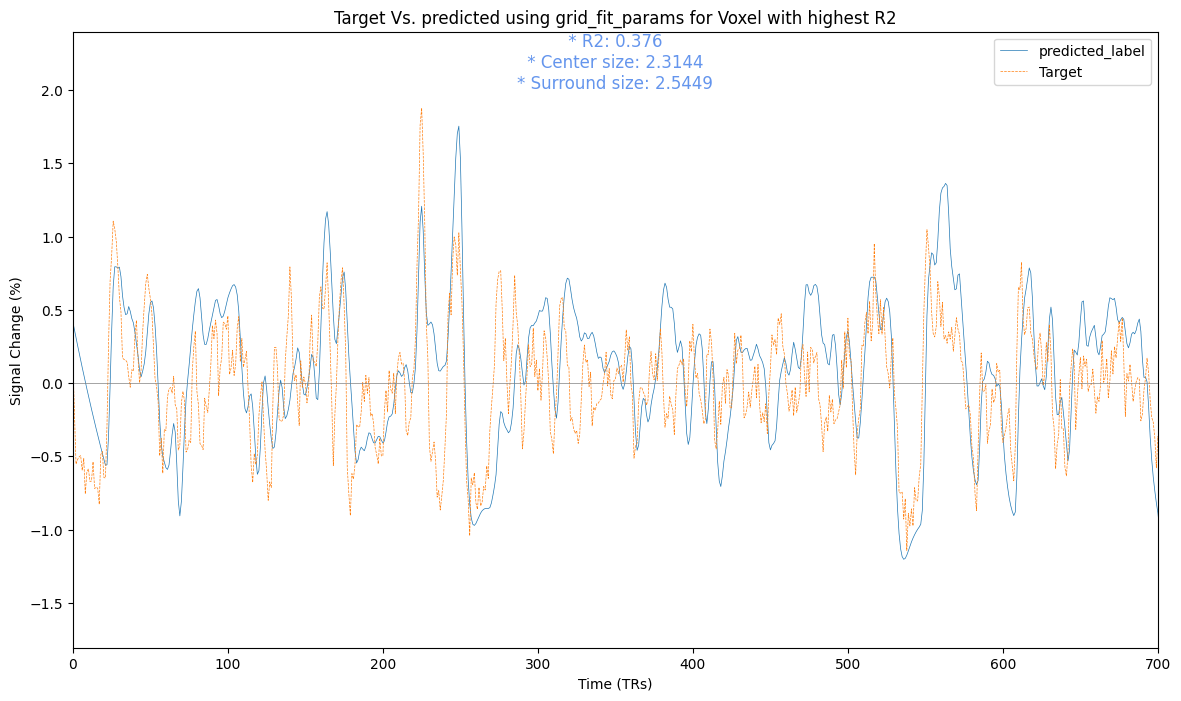

In [222]:
plot_time_series(predicted_time_series, target_time_series, max_r2_grid_fit, param_value= param_values, fit_type="grid_fit_params", limit_time=True)

### For the iterative fit

In [98]:

target_time_series = my_analysis.sub.data_train[fold].T[max_r2_iterative_fit]
predicted_time_series = predict_time_series(nm, max_r2_iterative_fit, dn['iterative_search_params'])

In [108]:
param_values_iter = f" * R2: {round(dn['iterative_search_params'][max_r2_iterative_fit][-1], 3)} \n* Center size: {round(dn['iterative_search_params'][max_r2_iterative_fit][1], 4)} \n * Surround size: {round(dn['iterative_search_params'][max_r2_iterative_fit][5], 4)}"

In [100]:
print(target_time_series.shape)
print(predicted_time_series.shape)

(2425,)
(2425,)


##### A zoomed in series can be found below for a the 0-700 TR segment.

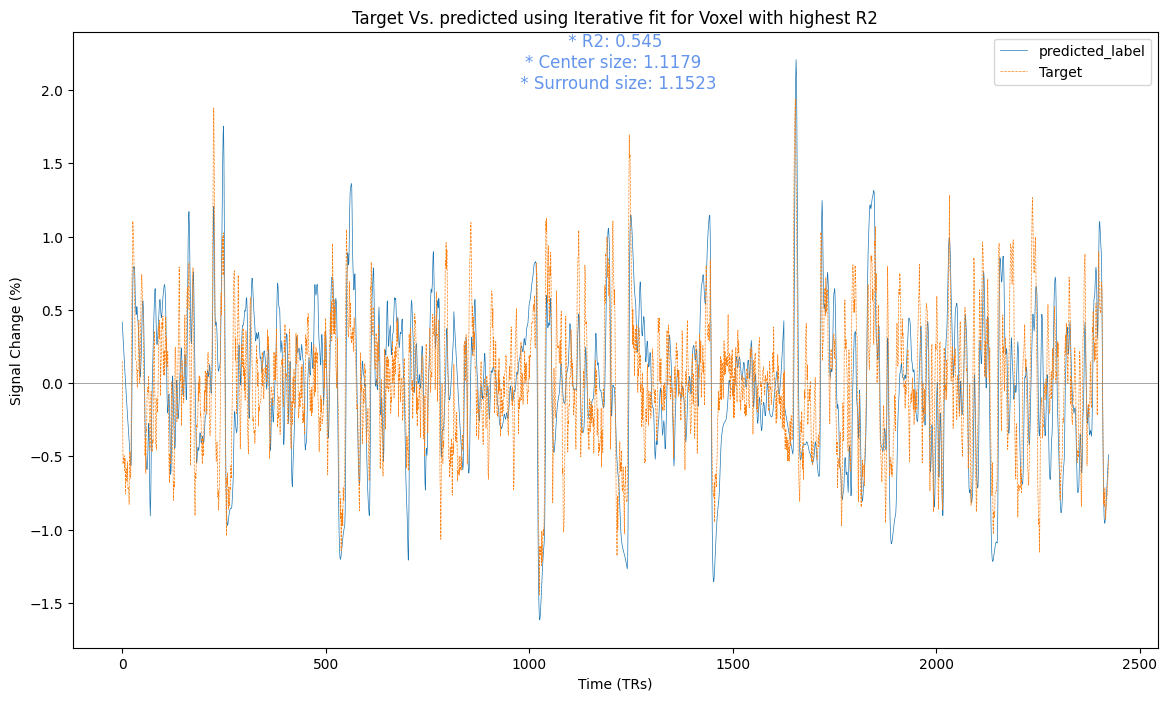

In [223]:
plot_time_series(predicted_time_series, target_time_series, max_r2_grid_fit, param_value=param_values_iter, fit_type="Iterative fit")

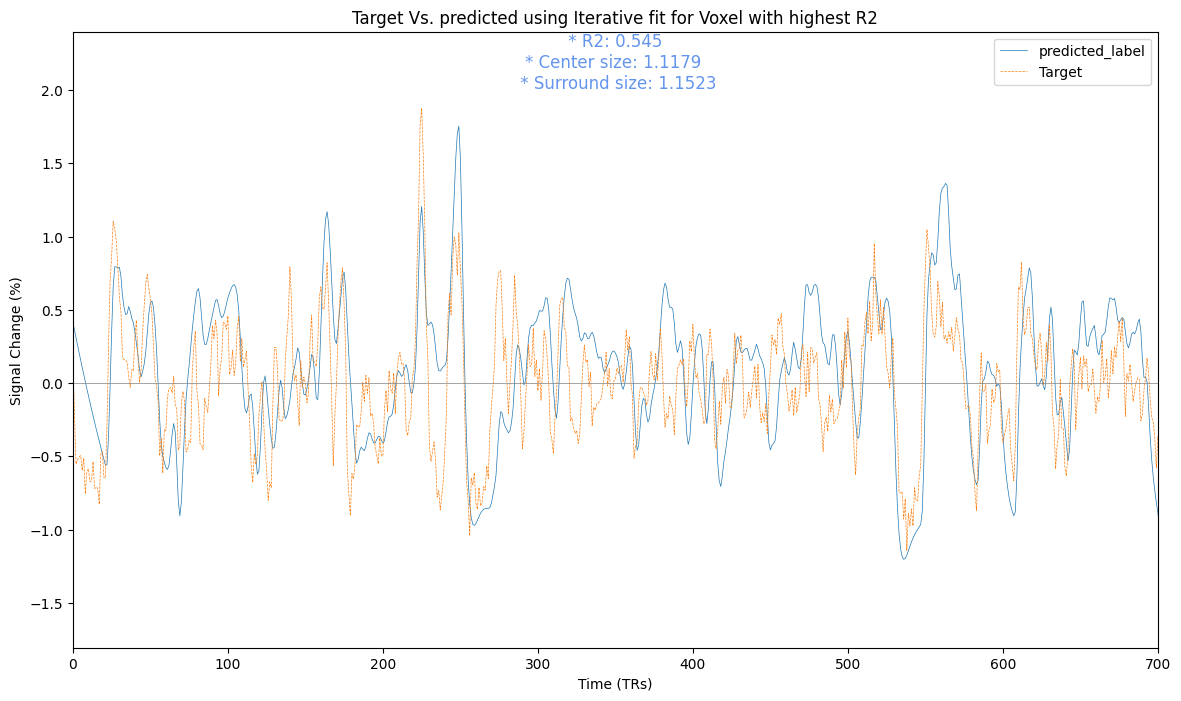

In [224]:
plot_time_series(predicted_time_series, target_time_series, max_r2_grid_fit, param_value=param_values_iter, fit_type="Iterative fit", limit_time = True)

#### For the test data

## A plot of the biggest improvement of the norm model relative to the CSS and gauss model.


#### Find voxel with the biggest r2 difference with both models.


In [141]:
max_r2_grid_gf_dn = np.argmax(dn['gridsearch_params'][mask][:, -1] - gm['gridsearch_params'][mask][:, -1])
max_r2_iterative_fit_dn_gf = np.argmax(dn['iterative_search_params'][mask][:, -1]-gm['iterative_search_params'][mask][:, -1])
max_r2_iterative_fit_dn_css = np.argmax(dn['iterative_search_params'][mask][:, -1]-css['iterative_search_params'][mask][:, -1])
max_r2_grid_gf_dn, max_r2_iterative_fit_dn_gf, max_r2_iterative_fit_dn_css

(369, 285, 269)

### Now for each of these vertices show model prediction of all three models.

In [198]:
def plot_time_series_multiple(predicted_dn, target, fit_type, predicted_css = None, predicted_gm = None, R2=[], limit_time=False):
    plt.figure(figsize=(17, 12))
    plt.plot(predicted_dn, label=f"DN - R2: {round(R2[0], 2)} ", linewidth=0.4)
    if predicted_css is not None:
        plt.plot(predicted_css, label=f"CSS - R2: {round(R2[1], 2)}", linewidth=0.4)
    if predicted_gm is not None:
        plt.plot(predicted_gm, label=f"Gaussian - R2: {round(R2[2], 2)}", linewidth=0.4)

    plt.plot(target, label="target", linewidth=0.4, linestyle='dashed', color="black")  
    # plt.text(0.5, 0.95, f'{}', fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)

    plt.title(f'predicted values of models vs. target using {fit_type} for highest R2 difference')
    plt.axhline(0, color='grey', linewidth=0.5)  
    if limit_time:
        plt.xlim([0, 700])  


    plt.xlabel('Time (TRs)')
    plt.ylabel('Signal Change (%)')
    plt.legend()
    plt.show()

In [115]:
#create the models
from prfpy.model import Iso1DGaussianModel
from prfpy.model import CSS_Iso1DGaussianModel

css_model=CSS_Iso1DGaussianModel(train_stim,filter_predictions=my_analysis.filter_predictions,filter_type=my_analysis.filter_type,filter_params=my_analysis.fparams)
gauss_model =Iso1DGaussianModel(train_stim,filter_predictions=my_analysis.filter_predictions,filter_type=my_analysis.filter_type,filter_params=my_analysis.fparams)

### For Improvement of R2 based on grid search params( DN - Gaussian )
(css is omitted here because I didn't do grid seach for it, should I do one?)


In [ ]:

gauss_model.stimulus = train_stim
target_time_series = my_analysis.sub.data_train[fold].T[mask][max_r2_grid_gf_dn]
gf_predictions = predict_time_series(gauss_model, max_r2_grid_gf_dn, gm['gridsearch_params'][mask])
dn_predictions = predict_time_series(nm, max_r2_grid_gf_dn, dn['gridsearch_params'][mask])
gf_predictions, dn_predictions, max_r2_grid_gf_dn

In [145]:
R2 = [dn['gridsearch_params'][mask][max_r2_grid_gf_dn][-1], 0, gm['gridsearch_params'][mask][max_r2_grid_gf_dn][-1]]

#### Now plotting .... Take a look at the second timeseries for a clear and zoomed in for a time range.

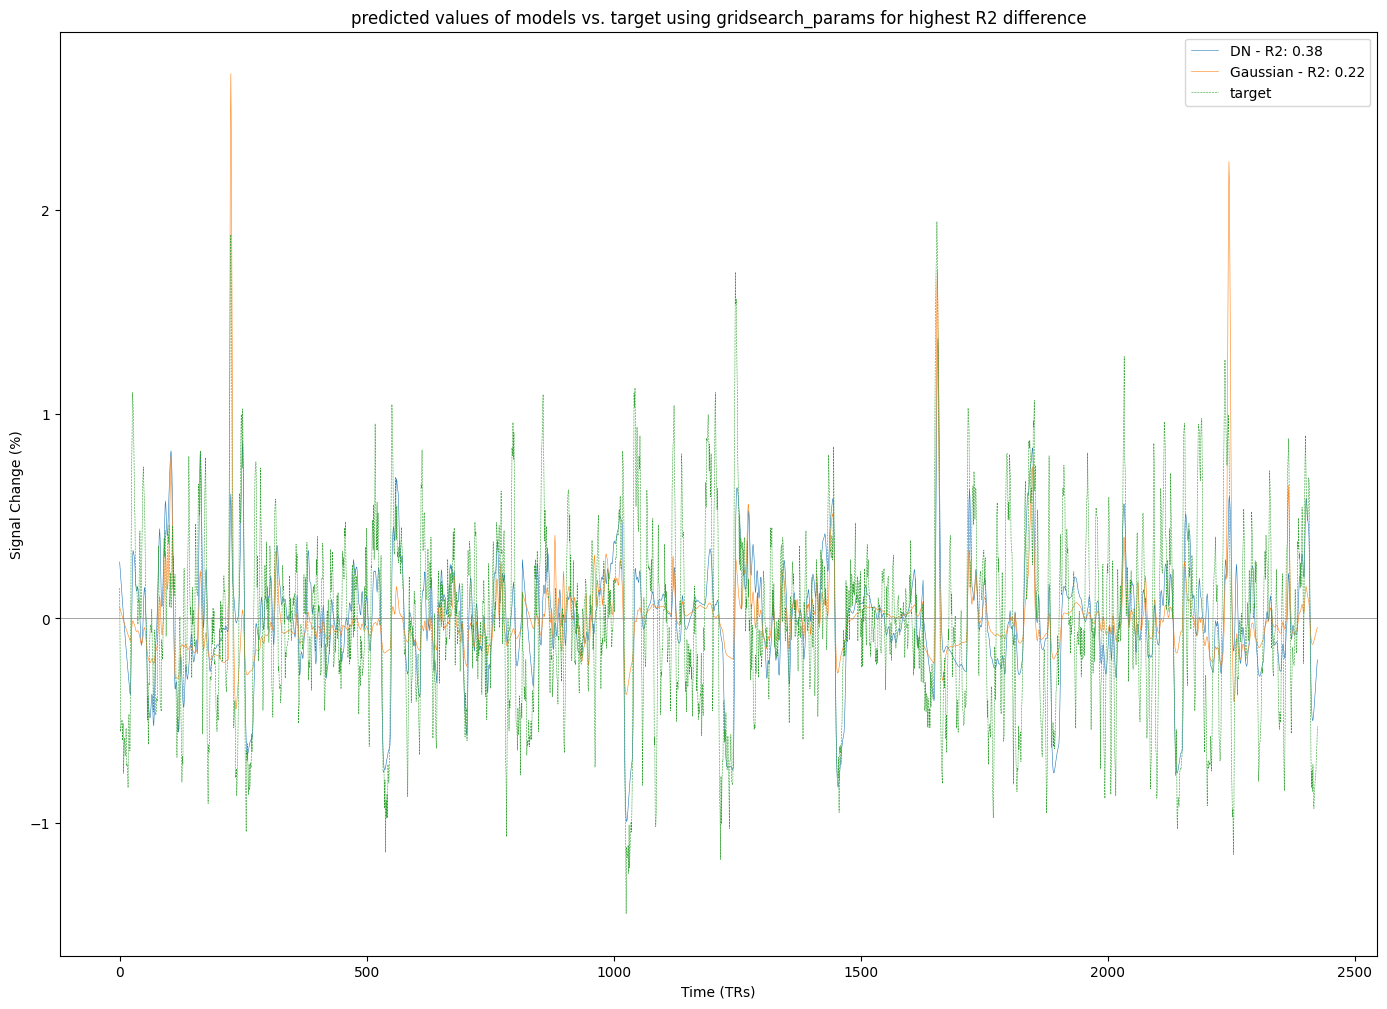

In [170]:
plot_time_series_multiple(target =target_time_series, predicted_dn=dn_predictions, predicted_gm=gf_predictions, fit_type="gridsearch_params",R2=R2 )

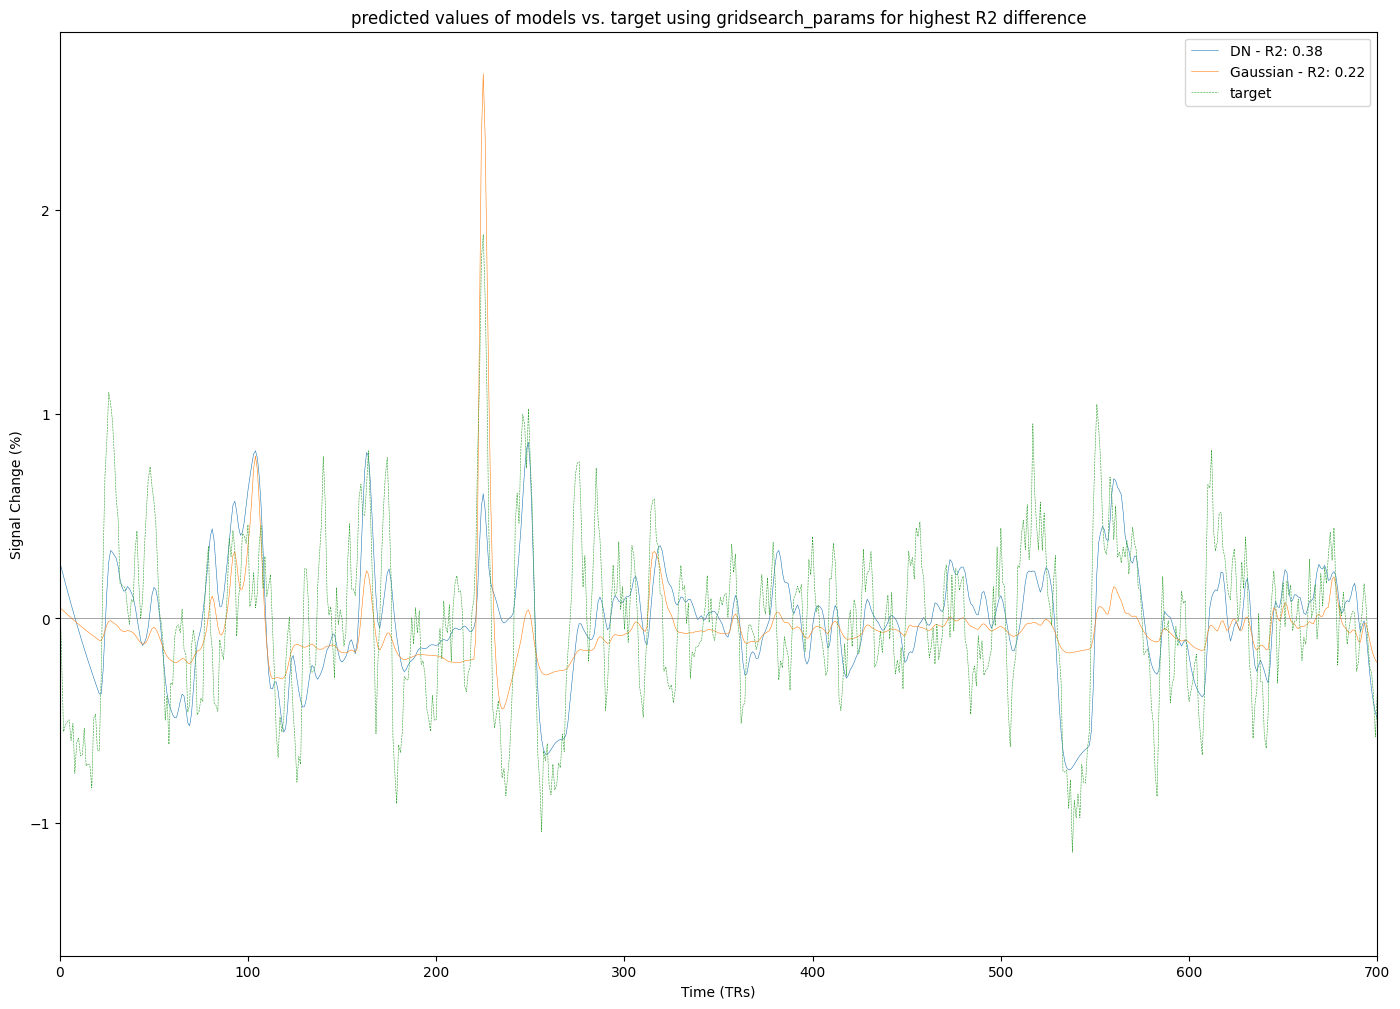

In [171]:
plot_time_series_multiple(target =target_time_series, predicted_dn=dn_predictions, predicted_gm=gf_predictions, fit_type="gridsearch_params",R2=R2, limit_time=True )

### For Improvement of R2 based on Iterative search params( DN - Gaussian and DN - CSS )


#### For the vertice with a maximum R2 of Divisive normalisation - Gaussian

In [182]:
css_model.stimulus = train_stim
target_time_series_dn_gf = my_analysis.sub.data_train[fold].T[mask][max_r2_iterative_fit_dn_gf]
gf_predictions_iter = predict_time_series(gauss_model, max_r2_iterative_fit_dn_gf, gm['iterative_search_params'][mask])
css_predictions_iter = predict_time_series(css_model, max_r2_iterative_fit_dn_gf, css['iterative_search_params'][mask])
dn_predictions_iter = predict_time_series(nm, max_r2_iterative_fit_dn_gf, dn['iterative_search_params'][mask])
gf_predictions_iter,css_predictions_iter, dn_predictions_iter, max_r2_iterative_fit_dn_gf


(array([ 0.28610258,  0.26769326,  0.24948951, ..., -0.19067438,
        -0.18927087, -0.1885813 ]),
 array([ 0.47126862,  0.41801983,  0.36552599, ..., -0.49231061,
        -0.44356919, -0.39881422]),
 array([ 0.41171262,  0.36388104,  0.31664995, ..., -0.56706458,
        -0.52458224, -0.48631817]),
 285)

In [177]:
R2_iter_dn_gf = [dn['iterative_search_params'][mask][max_r2_iterative_fit_dn_gf][-1], css['iterative_search_params'][mask][max_r2_iterative_fit_dn_gf][-1], gm['iterative_search_params'][mask][max_r2_iterative_fit_dn_gf][-1]]

#### Now plotting model predictions and target for the voxel with highest R2 for DN - Gauss... Take a look at the second timeseries for a clear and zoomed view of a time range.

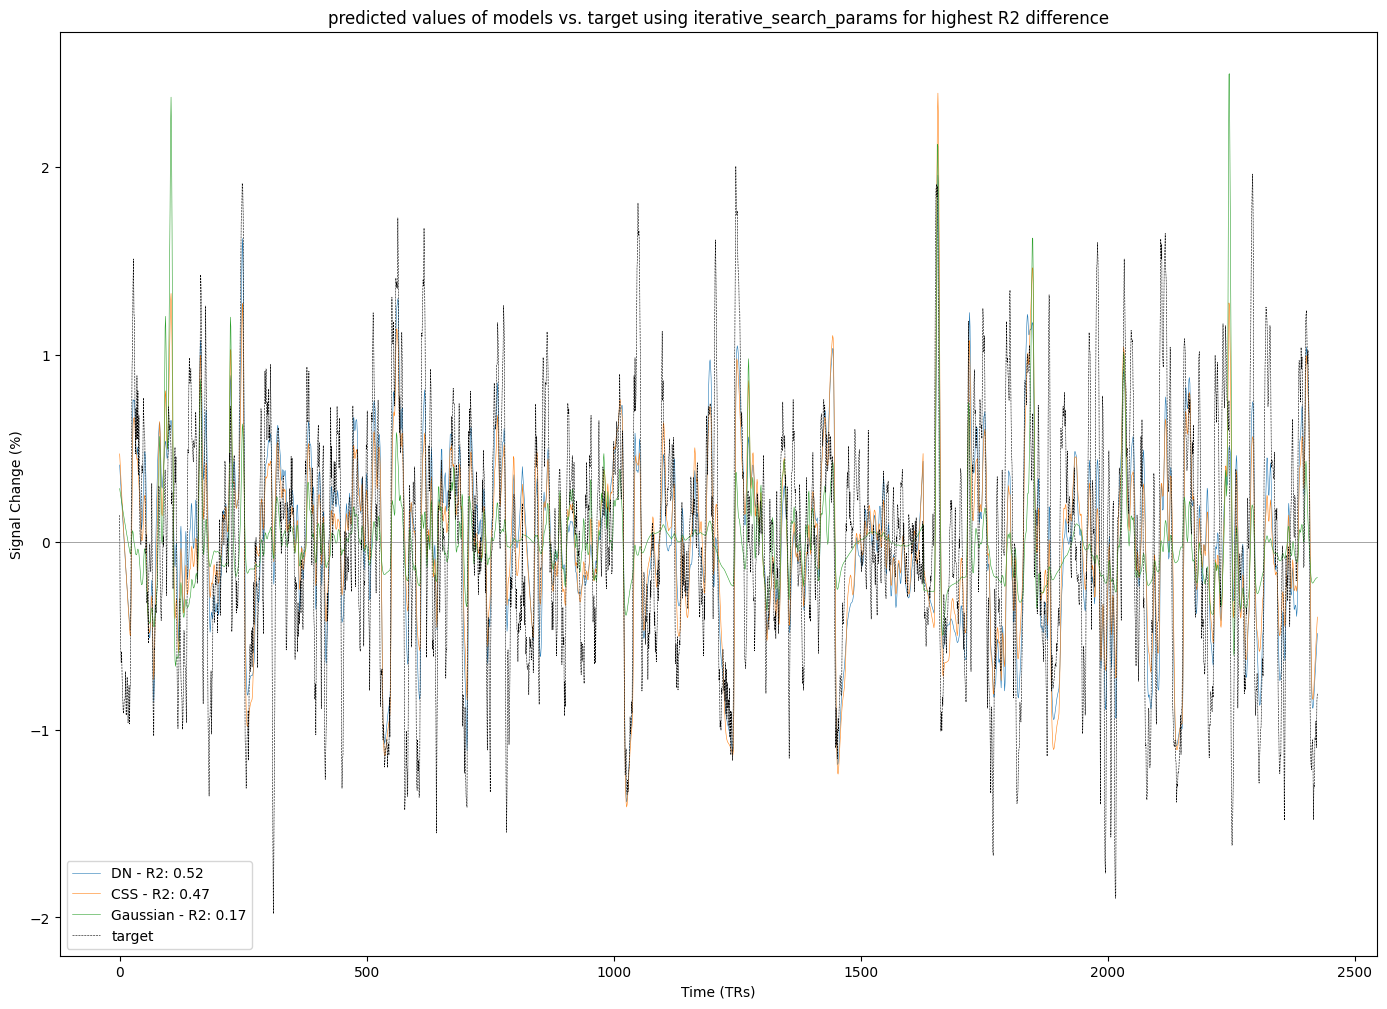

In [225]:
plot_time_series_multiple(target =target_time_series_dn_gf, predicted_css=css_predictions_iter, predicted_dn=dn_predictions_iter, predicted_gm=gf_predictions_iter, fit_type="iterative_search_params",R2=R2_iter_dn_gf )

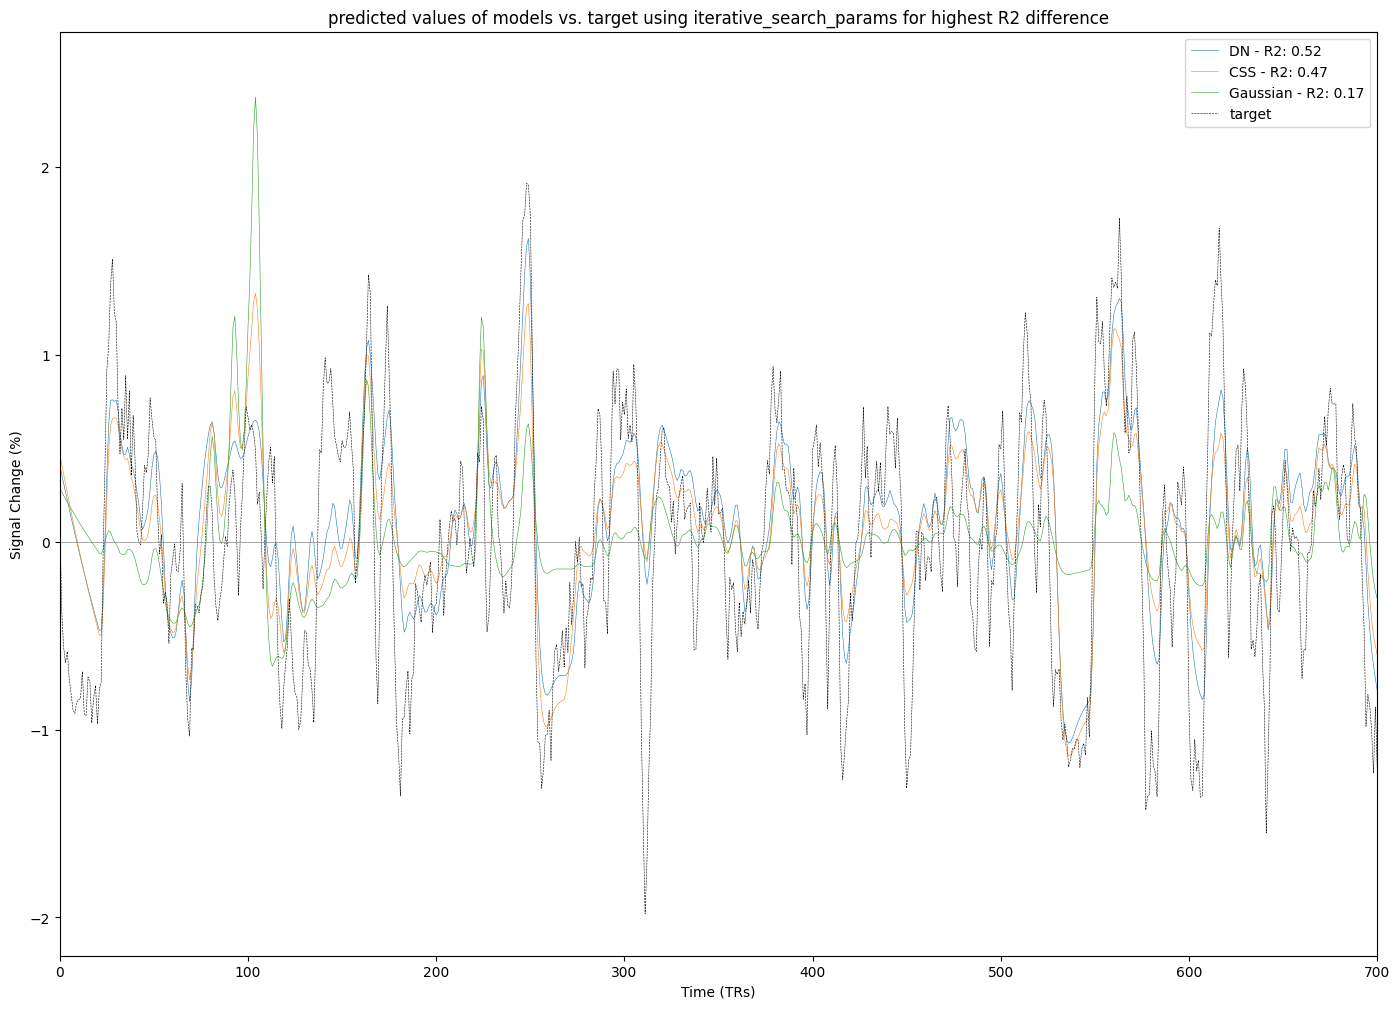

In [226]:
plot_time_series_multiple(target =target_time_series_dn_gf, predicted_dn=dn_predictions_iter, predicted_css=css_predictions_iter, predicted_gm=gf_predictions_iter, fit_type="iterative_search_params",R2=R2_iter_dn_gf, limit_time=True )

#### Now let's do the same for the vertice with a maximum value of difference in R2 of the Divisive normalisation and the CSS model.

In [194]:
css_model.stimulus = train_stim
target_time_series_dn_css = my_analysis.sub.data_train[fold].T[mask][max_r2_iterative_fit_dn_css]
gf_predictions_iter_ = predict_time_series(gauss_model, max_r2_iterative_fit_dn_css, gm['iterative_search_params'][mask])
css_predictions_iter_ = predict_time_series(css_model, max_r2_iterative_fit_dn_css, css['iterative_search_params'][mask])
dn_predictions_iter_ = predict_time_series(nm, max_r2_iterative_fit_dn_css, dn['iterative_search_params'][mask])
gf_predictions_iter_,css_predictions_iter_, dn_predictions_iter_, max_r2_iterative_fit_dn_css


/tank/oso210/projects/prfpy_Nick/prfpy/prfpy/model.py:679: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.hrf == 'direct':


(array([ 0.27176955,  0.25427453,  0.23697388, ..., -0.17960201,
        -0.17817766, -0.17744326]),
 array([ 0.44901339,  0.39852493,  0.34874676, ..., -0.46604217,
        -0.41953254, -0.37686023]),
 array([ 0.39731984,  0.35255712,  0.30834636, ..., -0.54614185,
        -0.50738166, -0.47261858]),
 269)

In [195]:
R2_iter_dn_css = [dn['iterative_search_params'][mask][max_r2_iterative_fit_dn_css][-1], css['iterative_search_params'][mask][max_r2_iterative_fit_dn_css][-1], gm['iterative_search_params'][mask][max_r2_iterative_fit_dn_css][-1]]

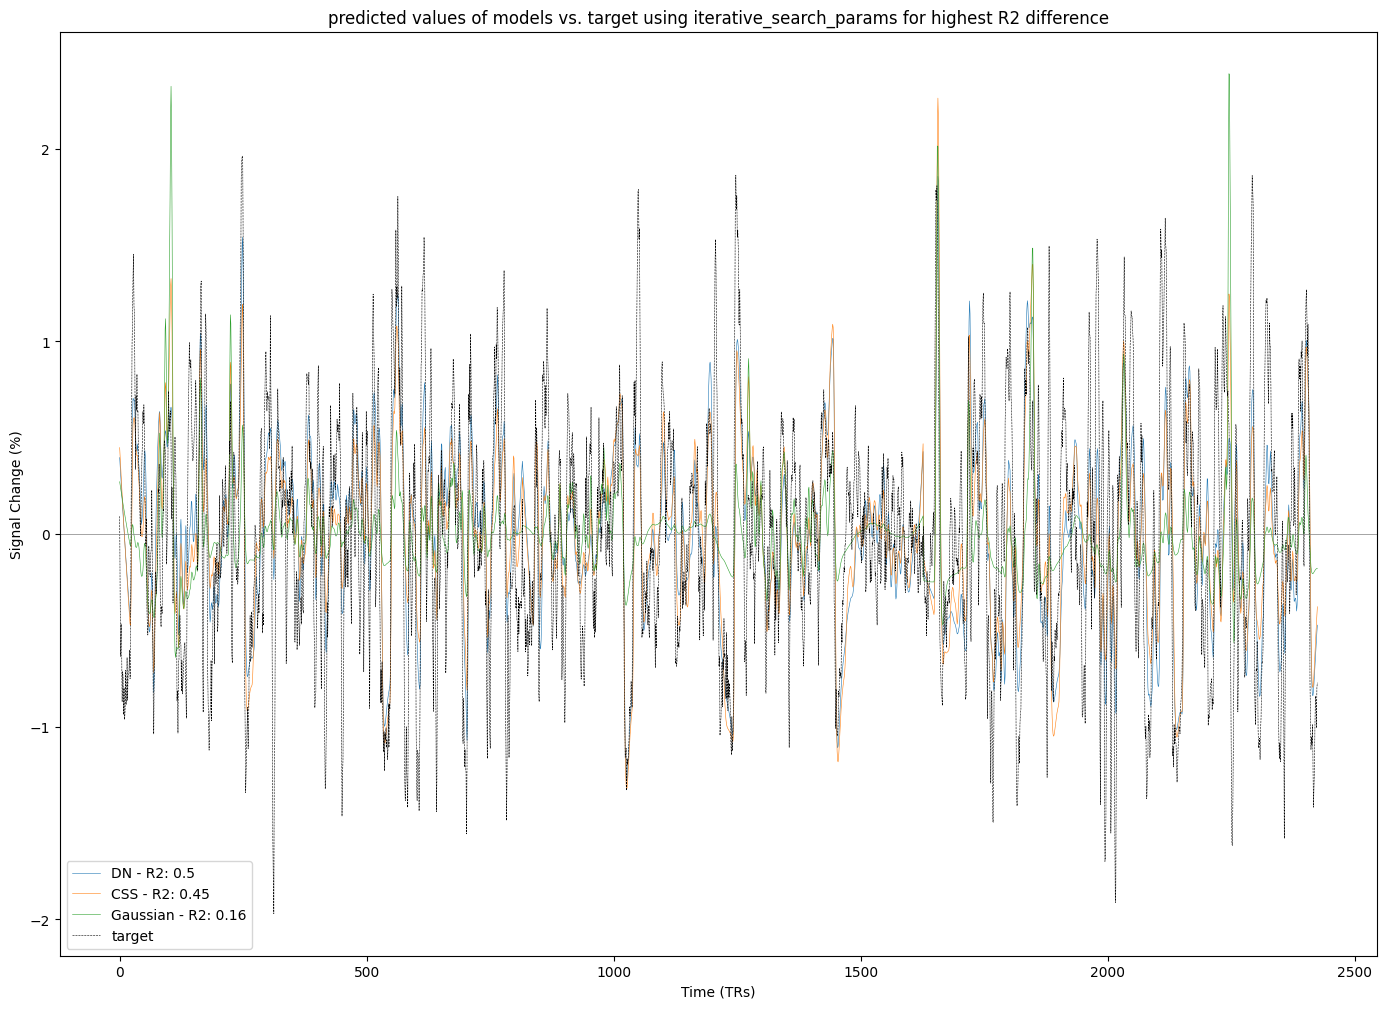

In [196]:
plot_time_series_multiple(target =target_time_series_dn_css, predicted_css=css_predictions_iter_, predicted_dn=dn_predictions_iter_, predicted_gm=gf_predictions_iter_, fit_type="iterative_search_params",R2=R2_iter_dn_css)

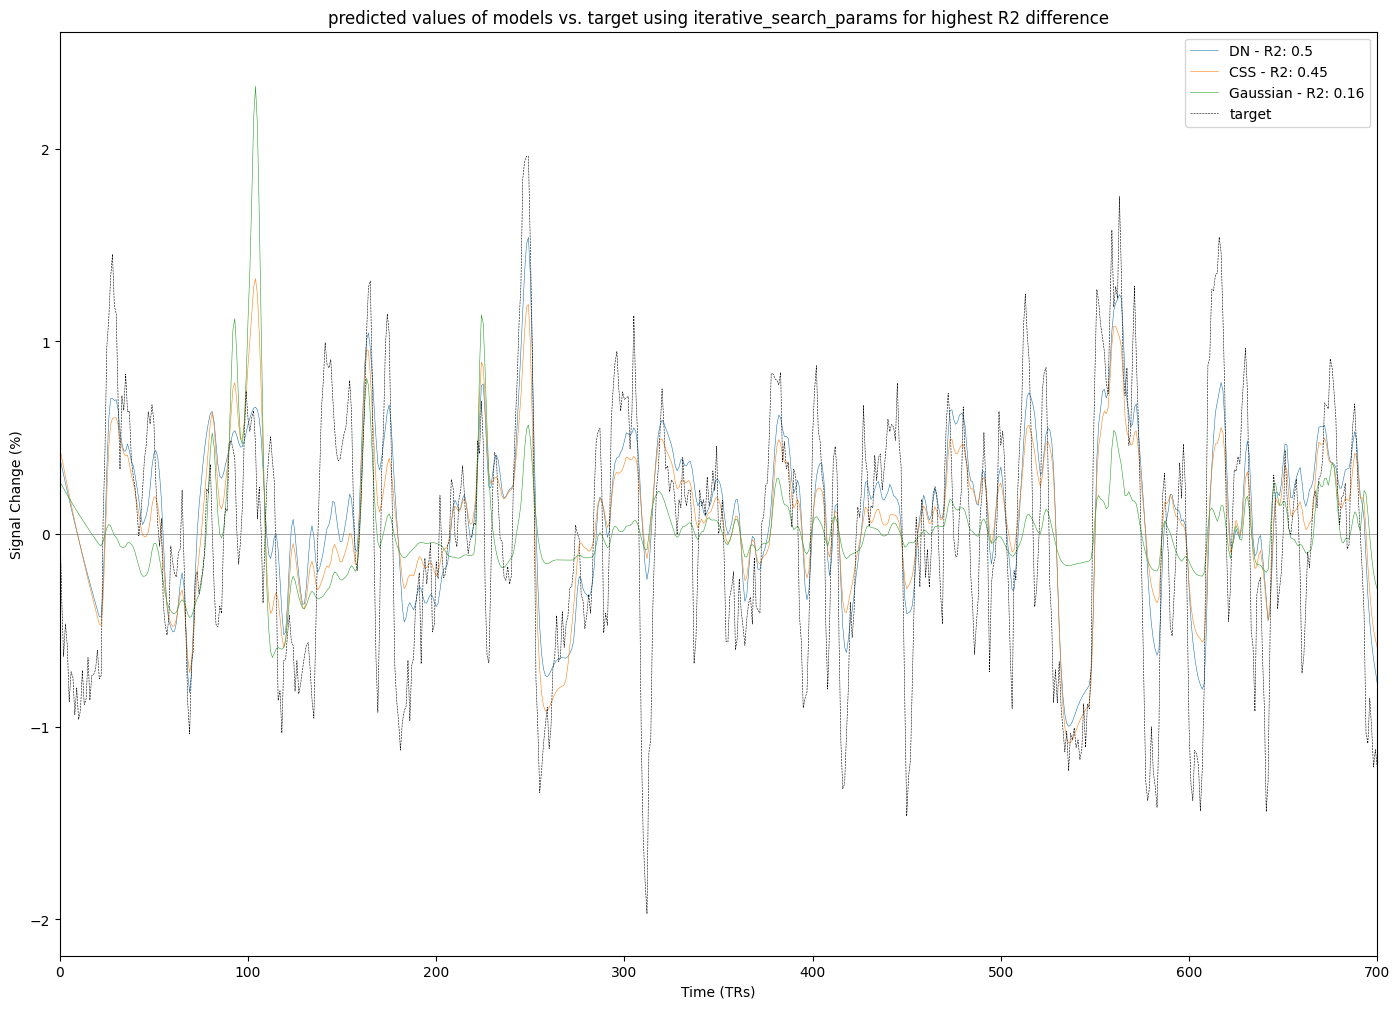

In [227]:
plot_time_series_multiple(target =target_time_series_dn_css, predicted_css=css_predictions_iter_, predicted_dn=dn_predictions_iter_, predicted_gm=gf_predictions_iter_, fit_type="iterative_search_params",R2=R2_iter_dn_css, limit_time=True)